In [2]:
#havershine distance ----give distance from google maps g(n)  h(n)
#priority ques f(N)
#3 i)case new node
#ii)already in open based in g(n)
#iii) already in closed
#exploration and path

In [1]:
import csv
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("/content/Lab 6 A star - Sheet.csv")
df.tail()

,Location,Latitude,Longitude
29,Girgaon chowpaty,18.953888,72.814558
30,Wankhede Stadium,18.938276,72.825746
31,Trident,18.927725,72.821198
32,Churchgate Station,18.933876,72.827663
33,Pizza By the Bay,18.933419,72.823988


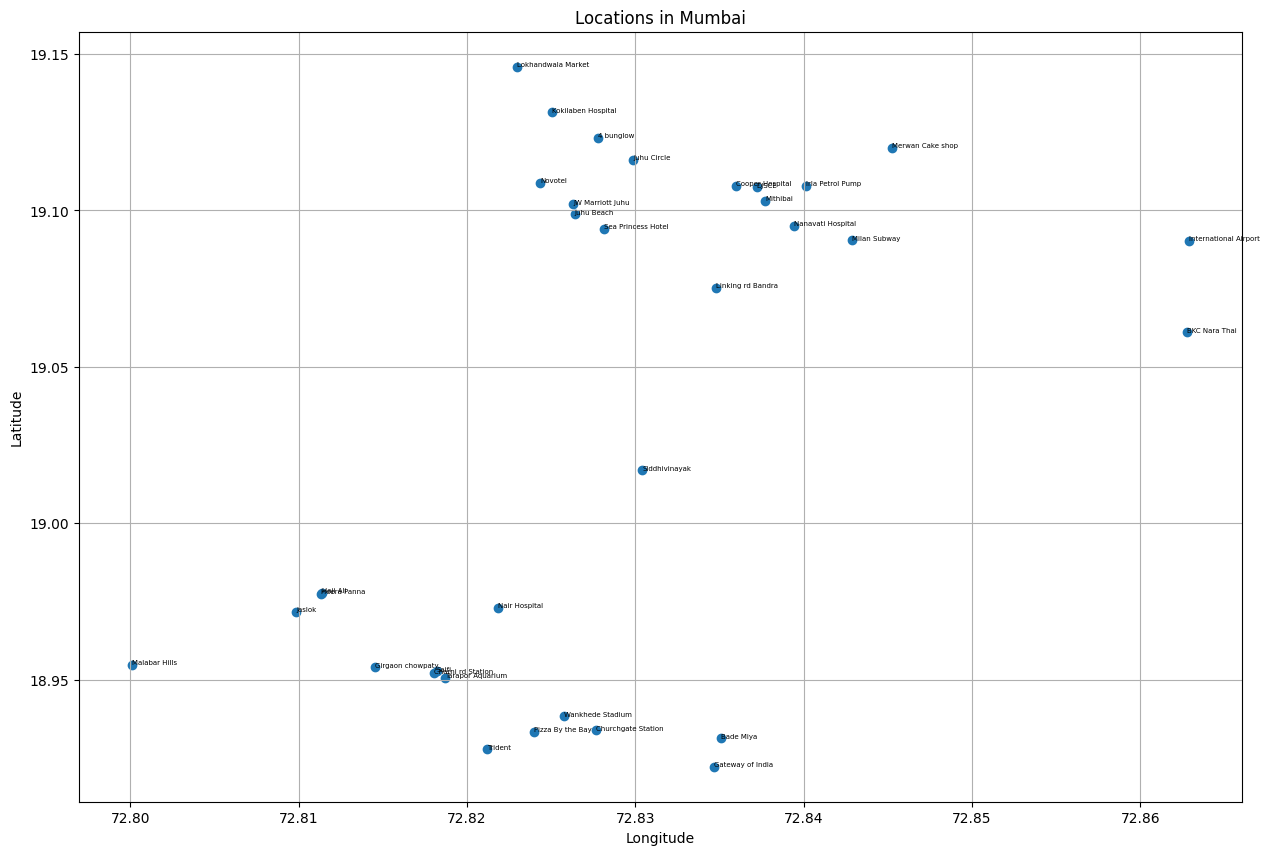

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.scatter(df['Longitude'], df['Latitude'])

for i, row in df.iterrows():
    plt.annotate(row['Location'], (row['Longitude'], row['Latitude']), fontsize=5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Locations in Mumbai')

plt.grid(True)
plt.show()

In [5]:
import math

def haversine_distance(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    radius = 6371
    distance = radius * c
    return round(distance,2)

In [6]:
location=df["Location"].values
lat=df["Latitude"].values
lon=df["Longitude"].values
haversine_distance(lat[0], lon[0], lat[0], lon[0])

0.0

In [7]:
print(location)

['DJSCE' 'Cooper Hospital' 'Mithibai' 'Irla Petrol Pump'
 'Merwan Cake shop' 'Juhu Circle' '4 bunglow' 'Kokilaben Hospital'
 'Lokhandwala Market' 'JW Marriott Juhu' 'Juhu Beach' 'Sea Princess Hotel'
 'Novotel' 'Linking rd Bandra' 'Heera Panna' 'Nanavati Hospital'
 'Milan Subway' 'Siddhivinayak' 'Haji Ali' 'Jaslok ' 'BKC Nara Thai'
 'Bade Miya' 'Gateway of India' 'Saifi' 'International Airport'
 'Tarapor Aquarium' 'Nair Hospital' 'Malabar Hills' 'Charni rd Station'
 'Girgaon chowpaty' 'Wankhede Stadium' 'Trident' 'Churchgate Station'
 'Pizza By the Bay']


In [8]:
cost_matrix=[]
for i in range(len(location)):
  a=[]
  for j in range(len(location)):
    a.append(haversine_distance(lat[i],lon[i],lat[j],lon[j]))
  cost_matrix.append(a)

for i in range(len(cost_matrix)):
    for j in range(len(cost_matrix[i])):
        print(f'{cost_matrix[i][j]:.2f}', end='\t')
    print()

0.00	0.14	0.49	0.31	1.64	1.24	2.02	2.95	4.53	1.29	1.48	1.76	1.36	3.59	14.71	1.40	1.97	10.09	14.68	15.36	5.81	19.59	20.61	17.33	3.30	17.55	15.04	17.42	17.40	17.24	18.85	20.06	19.33	19.40	
0.14	0.00	0.57	0.43	1.66	1.12	1.91	2.85	4.44	1.21	1.42	1.74	1.23	3.64	14.74	1.48	2.06	10.13	14.71	15.39	5.91	19.64	20.66	17.36	3.43	17.59	15.07	17.45	17.43	17.28	18.90	20.10	19.37	19.45	
0.49	0.57	0.00	0.59	2.05	1.68	2.47	3.41	5.01	1.21	1.28	1.41	1.54	3.11	14.24	0.91	1.49	9.60	14.21	14.89	5.35	19.11	20.12	16.85	3.00	17.07	14.56	16.96	16.92	16.77	18.37	19.58	18.84	18.92	
0.31	0.43	0.59	0.00	1.46	1.42	2.14	3.05	4.60	1.59	1.76	1.98	1.66	3.67	14.82	1.43	1.95	10.16	14.78	15.47	5.71	19.65	20.66	17.41	3.08	17.63	15.12	17.54	17.48	17.33	18.92	20.13	19.39	19.47	
1.64	1.66	2.05	1.46	0.00	1.67	1.86	2.46	3.71	2.82	3.08	3.40	2.53	5.10	16.25	2.85	3.29	11.57	16.22	16.90	6.80	21.02	22.03	18.83	3.79	19.05	16.53	18.98	18.90	18.76	20.32	21.54	20.79	20.87	
1.24	1.12	1.68	1.42	1.67	0.00	0.82	1.76	3.39	1.62	1.96	2.46	1.01	4

In [9]:
location_costs = {}
for i, locations in enumerate(location):
    location_costs[locations] = {}
    for j, cost in enumerate(cost_matrix[i]):
        location_costs[locations][location[j]] = cost
print(location_costs)

{'DJSCE': {'DJSCE': 0.0, 'Cooper Hospital': 0.14, 'Mithibai': 0.49, 'Irla Petrol Pump': 0.31, 'Merwan Cake shop': 1.64, 'Juhu Circle': 1.24, '4 bunglow': 2.02, 'Kokilaben Hospital': 2.95, 'Lokhandwala Market': 4.53, 'JW Marriott Juhu': 1.29, 'Juhu Beach': 1.48, 'Sea Princess Hotel': 1.76, 'Novotel': 1.36, 'Linking rd Bandra': 3.59, 'Heera Panna': 14.71, 'Nanavati Hospital': 1.4, 'Milan Subway': 1.97, 'Siddhivinayak': 10.09, 'Haji Ali': 14.68, 'Jaslok ': 15.36, 'BKC Nara Thai': 5.81, 'Bade Miya': 19.59, 'Gateway of India': 20.61, 'Saifi': 17.33, 'International Airport': 3.3, 'Tarapor Aquarium': 17.55, 'Nair Hospital': 15.04, 'Malabar Hills': 17.42, 'Charni rd Station': 17.4, 'Girgaon chowpaty': 17.24, 'Wankhede Stadium': 18.85, 'Trident': 20.06, 'Churchgate Station': 19.33, 'Pizza By the Bay': 19.4}, 'Cooper Hospital': {'DJSCE': 0.14, 'Cooper Hospital': 0.0, 'Mithibai': 0.57, 'Irla Petrol Pump': 0.43, 'Merwan Cake shop': 1.66, 'Juhu Circle': 1.12, '4 bunglow': 1.91, 'Kokilaben Hospital'

In [10]:
heuristic_values = []
def cal_hn(distance ,goal):
    for i in range(len(distance)):
            heuristic_value = haversine_distance(lat[goal], lon[goal], lat[i], lon[i])
            heuristic_values.append(round(heuristic_value,2))
    return (heuristic_values)

goal=int(input("Enter row no. of goal node"))
cal_hn(cost_matrix,goal)
print("loc\t\th(n)")
for i in range(len(location)):
  print(f"{location[i]}\t\t|{heuristic_values[i]}")

Enter row no. of goal node31
loc		h(n)
DJSCE		|20.06
Cooper Hospital		|20.1
Mithibai		|19.58
Irla Petrol Pump		|20.13
Merwan Cake shop		|21.54
Juhu Circle		|20.98
4 bunglow		|21.75
Kokilaben Hospital		|22.65
Lokhandwala Market		|24.26
JW Marriott Juhu		|19.39
Juhu Beach		|19.04
Sea Princess Hotel		|18.52
Novotel		|20.14
Linking rd Bandra		|16.47
Heera Panna		|5.62
Nanavati Hospital		|18.7
Milan Subway		|18.25
Siddhivinayak		|9.97
Haji Ali		|5.66
Jaslok 		|5.04
BKC Nara Thai		|15.47
Bade Miya		|1.52
Gateway of India		|1.55
Saifi		|2.79
International Airport		|18.61
Tarapor Aquarium		|2.56
Nair Hospital		|5.04
Malabar Hills		|3.74
Charni rd Station		|2.73
Girgaon chowpaty		|2.99
Wankhede Stadium		|1.27
Trident		|0.0
Churchgate Station		|0.96
Pizza By the Bay		|0.7


In [11]:
h_n = dict(zip(location, heuristic_values))
print(h_n)

{'DJSCE': 20.06, 'Cooper Hospital': 20.1, 'Mithibai': 19.58, 'Irla Petrol Pump': 20.13, 'Merwan Cake shop': 21.54, 'Juhu Circle': 20.98, '4 bunglow': 21.75, 'Kokilaben Hospital': 22.65, 'Lokhandwala Market': 24.26, 'JW Marriott Juhu': 19.39, 'Juhu Beach': 19.04, 'Sea Princess Hotel': 18.52, 'Novotel': 20.14, 'Linking rd Bandra': 16.47, 'Heera Panna': 5.62, 'Nanavati Hospital': 18.7, 'Milan Subway': 18.25, 'Siddhivinayak': 9.97, 'Haji Ali': 5.66, 'Jaslok ': 5.04, 'BKC Nara Thai': 15.47, 'Bade Miya': 1.52, 'Gateway of India': 1.55, 'Saifi': 2.79, 'International Airport': 18.61, 'Tarapor Aquarium': 2.56, 'Nair Hospital': 5.04, 'Malabar Hills': 3.74, 'Charni rd Station': 2.73, 'Girgaon chowpaty': 2.99, 'Wankhede Stadium': 1.27, 'Trident': 0.0, 'Churchgate Station': 0.96, 'Pizza By the Bay': 0.7}


In [12]:
openlist=[]
closed=[]

In [13]:
def GoalTestNode(node,Goal):
    if node==Goal:
        return True
    return False

In [14]:
def generate_successor_nodes(current_node, distance_matrix, heuristic_matrix):
    successors = []

    current_node_index = current_node
    for i in range(len(distance_matrix[current_node_index])):
        g_value = distance_matrix[current_node_index][i]
        h_value = heuristic_matrix[i]
        f_value = g_value + h_value
        successor_node = (i, g_value, h_value, f_value)
        successors.append(successor_node)
    return successors

current_node = 0
successors = generate_successor_nodes(current_node, cost_matrix, heuristic_values)

for successor in successors:
    print(f"Node {successor[0]} - g(n): {successor[1]}, h(n): {successor[2]}, f(n): {successor[3]}")

Node 0 - g(n): 0.0, h(n): 20.06, f(n): 20.06
Node 1 - g(n): 0.14, h(n): 20.1, f(n): 20.240000000000002
Node 2 - g(n): 0.49, h(n): 19.58, f(n): 20.069999999999997
Node 3 - g(n): 0.31, h(n): 20.13, f(n): 20.439999999999998
Node 4 - g(n): 1.64, h(n): 21.54, f(n): 23.18
Node 5 - g(n): 1.24, h(n): 20.98, f(n): 22.22
Node 6 - g(n): 2.02, h(n): 21.75, f(n): 23.77
Node 7 - g(n): 2.95, h(n): 22.65, f(n): 25.599999999999998
Node 8 - g(n): 4.53, h(n): 24.26, f(n): 28.790000000000003
Node 9 - g(n): 1.29, h(n): 19.39, f(n): 20.68
Node 10 - g(n): 1.48, h(n): 19.04, f(n): 20.52
Node 11 - g(n): 1.76, h(n): 18.52, f(n): 20.28
Node 12 - g(n): 1.36, h(n): 20.14, f(n): 21.5
Node 13 - g(n): 3.59, h(n): 16.47, f(n): 20.06
Node 14 - g(n): 14.71, h(n): 5.62, f(n): 20.330000000000002
Node 15 - g(n): 1.4, h(n): 18.7, f(n): 20.099999999999998
Node 16 - g(n): 1.97, h(n): 18.25, f(n): 20.22
Node 17 - g(n): 10.09, h(n): 9.97, f(n): 20.060000000000002
Node 18 - g(n): 14.68, h(n): 5.66, f(n): 20.34
Node 19 - g(n): 15

In [16]:
movegen = {}
def create_movegen(cost_matrix, locations, threshold_distance):
    for i, location in enumerate(locations):
        neighbors = {}
        for j in range(len(cost_matrix[i])):
            if i != j and cost_matrix[i][j] <= threshold_distance:
                neighbor_location = locations[j]
                neighbor_cost = cost_matrix[i][j]
                neighbors[neighbor_location] = neighbor_cost
        movegen[location] = neighbors
    return movegen

threshold_distance = 6.0
movegen = create_movegen(cost_matrix, location, threshold_distance)
movegen

{'DJSCE': {'Cooper Hospital': 0.14,
  'Mithibai': 0.49,
  'Irla Petrol Pump': 0.31,
  'Merwan Cake shop': 1.64,
  'Juhu Circle': 1.24,
  '4 bunglow': 2.02,
  'Kokilaben Hospital': 2.95,
  'Lokhandwala Market': 4.53,
  'JW Marriott Juhu': 1.29,
  'Juhu Beach': 1.48,
  'Sea Princess Hotel': 1.76,
  'Novotel': 1.36,
  'Linking rd Bandra': 3.59,
  'Nanavati Hospital': 1.4,
  'Milan Subway': 1.97,
  'BKC Nara Thai': 5.81,
  'International Airport': 3.3},
 'Cooper Hospital': {'DJSCE': 0.14,
  'Mithibai': 0.57,
  'Irla Petrol Pump': 0.43,
  'Merwan Cake shop': 1.66,
  'Juhu Circle': 1.12,
  '4 bunglow': 1.91,
  'Kokilaben Hospital': 2.85,
  'Lokhandwala Market': 4.44,
  'JW Marriott Juhu': 1.21,
  'Juhu Beach': 1.42,
  'Sea Princess Hotel': 1.74,
  'Novotel': 1.23,
  'Linking rd Bandra': 3.64,
  'Nanavati Hospital': 1.48,
  'Milan Subway': 2.06,
  'BKC Nara Thai': 5.91,
  'International Airport': 3.43},
 'Mithibai': {'DJSCE': 0.49,
  'Cooper Hospital': 0.57,
  'Irla Petrol Pump': 0.59,
  'Mer

In [17]:
def Propogate_improvement(M,closed,g,k,h,parent,f):
    for X in movegen(M,location,df):
        if((g[M]+k[M][X])<g[X]):
            parent[X]=M
            g[X]=g[M]+k[M][X]
            f[X]=g[X]+h[X]
            if(X in list(zip(*closed))[0]):
                g,f,parent=Propogate_improvement(X,closed,g,k,h,parent,f)
            return g,f,parent

In [18]:
import heapq

def astar(graph, start, goal, heuristics):
    def GoalTestNode(node):
        return node == goal

    def ReconstructPath(came_from, current):
        path = []
        while current is not None:
            path.insert(0, current)
            current = came_from.get(current, None)
        return path

    def movegen(node):
        return graph[node]

    def PropagateImprovement(current, neighbor, g_score, came_from, open_list):
        tentative_g_score = g_score[current] + graph[current][neighbor]
        if tentative_g_score < g_score.get(neighbor, float('inf')):
            came_from[neighbor] = current
            g_score[neighbor] = tentative_g_score
            f_score = tentative_g_score + heuristics[neighbor]
            heapq.heappush(open_list, (f_score, neighbor))

    open_list = [(heuristics[start], start)]
    came_from = {}
    g_score = {node: float('inf') for node in graph}
    g_score[start] = 0

    while open_list:
        _, current = heapq.heappop(open_list)

        if GoalTestNode(current):
            path = ReconstructPath(came_from, current)
            cost = g_score[current]+heuristics[current]
            return path, cost

        for neighbor in movegen(current):
            PropagateImprovement(current, neighbor, g_score, came_from, open_list)

    return None, None

start_node = 'DJSCE'
goal_node = 'Trident'

path, cost = astar(movegen, start_node, goal_node, h_n)
if path is not None:
    print("Shortest Path:", path)
    print("Cost of Path:", cost)
else:
    print("No path found.")


Shortest Path: ['DJSCE', 'BKC Nara Thai', 'Siddhivinayak', 'Nair Hospital', 'Trident']
Cost of Path: 21.79
